# Problem statement

2) Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

import scipy.stats as stats

##### Reading CSV

In [2]:
raw_data1= pd.read_csv(r"C:\Users\Training Team\Desktop\ExcelR\Assignments\4_linear regression\Salary_Data.csv")
raw_data1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
raw_data=raw_data1.copy()

# Asking Basic questions on data

**1. What is shape of data?**

In [4]:
raw_data.shape

(30, 2)

**2. How does data look like?** 

In [5]:
raw_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


**3. Any missing Values?**

In [6]:
raw_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

**4. Any Duplicate Values?**

In [7]:
raw_data.duplicated().sum()

0

**5. What are the data type of features?**

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


**6. How does data look numerically?**

In [9]:
raw_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


**7. Coorelation**

In [10]:
raw_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


###### here Corr value for years of exp and salary is 0.9782. hence both variables are highly correlated

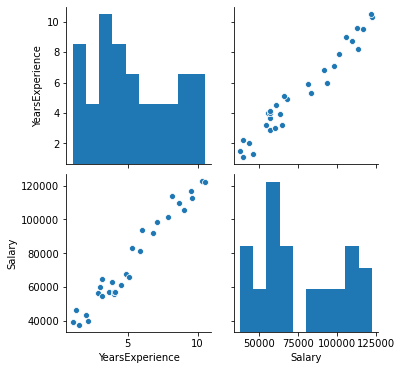

In [11]:
sns.pairplot(raw_data)

###### we can see that as years of exp increases, the salary aslo increases linearly

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <a list of 10 Patch objects>)

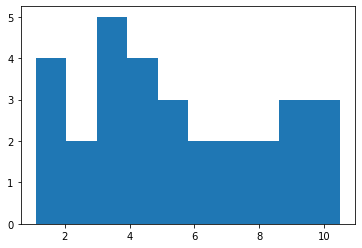

In [12]:
plt.hist(raw_data['YearsExperience'])

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <a list of 10 Patch objects>)

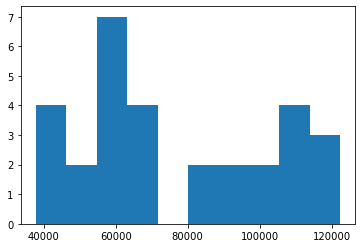

In [13]:
plt.hist(raw_data['Salary'])

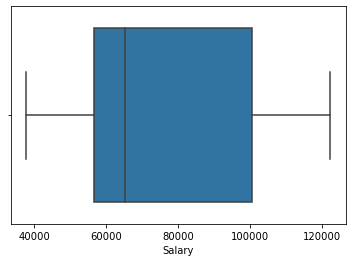

In [14]:
sns.boxplot(raw_data['Salary'])

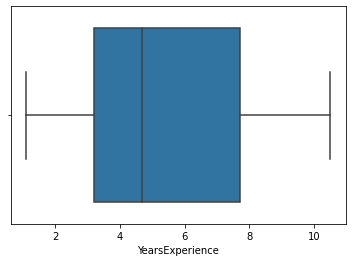

In [15]:
sns.boxplot(raw_data['YearsExperience'])

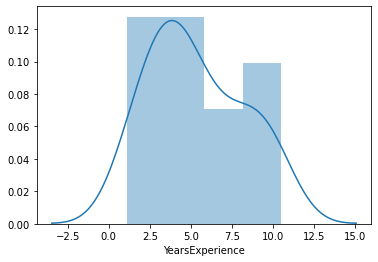

In [16]:
sns.distplot(raw_data['YearsExperience'])

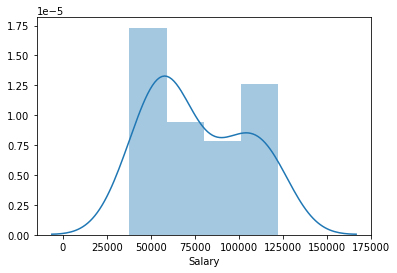

In [17]:
sns.distplot(raw_data['Salary'])

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([ 37731.,  39343.,  39891.,  43525.,  46205.,  54445.,  55794.,
          56642.,  56957.,  57081.,  57189.,  60150.,  61111.,  63218.,
          64445.,  66029.,  67938.,  81363.,  83088.,  91738.,  93940.,
          98273., 101302., 105582., 109431., 112635., 113812., 116969.,
         121872., 122391.])),
 (27455.69527696773, 76003.0, 0.9636361737531801))

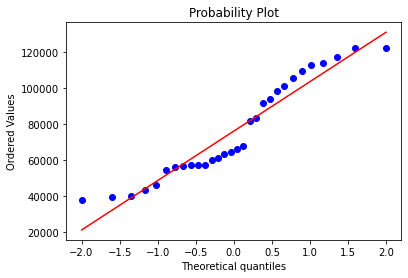

In [18]:
stats.probplot(raw_data['Salary'], dist= 'norm', plot= plt)

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
          4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
          7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])),
 (2.886343420068563, 5.313333333333333, 0.9786166317763666))

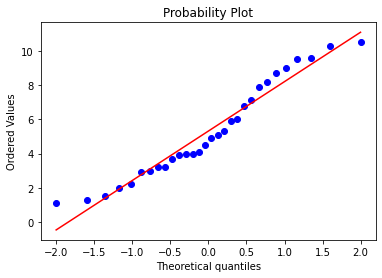

In [19]:
stats.probplot(raw_data['YearsExperience'], dist= 'norm', plot= plt)

##### Fitting a linear regression model

In [20]:
model = smf.ols("Salary~YearsExperience", data= raw_data).fit()

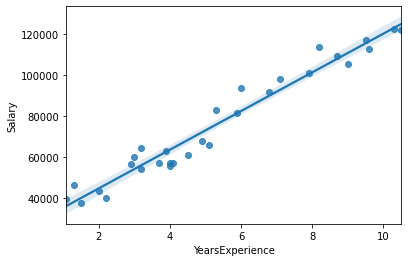

In [21]:
sns.regplot(x="YearsExperience", y="Salary", data=raw_data)

In [22]:
#Coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [23]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)  

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


###### here p values are less than 0.5, we reject the null hypothesis(H0: beta1=0). hence there is sufficient evidence to prove the relation between the years of exp and salary

In [24]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

###### Here r squared is 0.9569.

In [25]:
y_pred= model.predict(raw_data['YearsExperience'])
RMSE = rmse(raw_data['Salary'],y_pred)
RMSE

5592.043608760662

##### Predict for new data point

In [26]:
#Predict for 9.5, 10.5 and 9.6 years of experience
newdata=pd.Series([9.5, 9.6, 10.5])

In [27]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])

In [28]:
model.predict(data_pred)

0    115566.842252
1    116511.838485
2    125016.804574
dtype: float64

In [29]:
import pickle
filename = 'Salary_finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))